<a href="https://colab.research.google.com/github/zxc741xb/Clustering_wine/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import cluster, datasets
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/dataset/wine.data', header = None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
X = wine.drop(wine.columns[0], axis=1)
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
Y = wine[wine.columns[0]]
Y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

# Partitional Clustering

## sklearn.cluster.KMeans
* Fit all features of original data, plot by 1st and 2nd attribute.
* Fit only 1st and 2nd attribute, plot by 1st and 2nd attribute.

In [ ]:
km = cluster.KMeans(n_clusters=3).fit(X)

In [ ]:
km.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0], dtype=int32)

In [ ]:
def KmeansPlot(X,y,title,px_idx=0,py_idx=1):
  plt.figure(figsize=(3, 3))
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=y) # scatter by first and second column
  plt.title(title, fontsize=14, color="grey")

  # clustring to 2,3,4 clusters
  km2 = cluster.KMeans(n_clusters=2, n_init=10).fit(X)
  km3 = cluster.KMeans(n_clusters=3, n_init=10).fit(X)
  km4 = cluster.KMeans(n_clusters=4, n_init=10).fit(X)

  plt.figure(figsize=(9, 3))
  plt.subplot(131)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km2.labels_)
  plt.title("K=2, J=%.2f" % km2.inertia_)
  #inertia_:sum of squared distances of samples to their closest cluster center

  plt.subplot(132)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km3.labels_)
  plt.title("K=3, J=%.2f" % km3.inertia_)

  plt.subplot(133)
  plt.scatter(X.iloc[:, px_idx], X.iloc[:, py_idx], c=km4.labels_)
  plt.title("K=4, J=%.2f" % km4.inertia_)

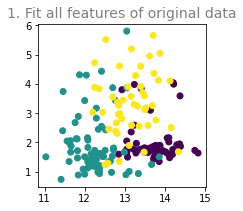

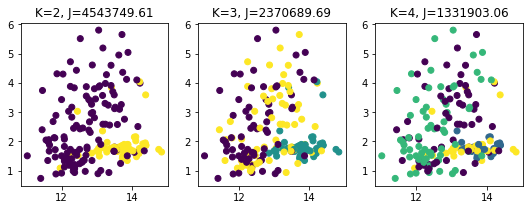

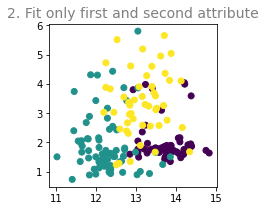

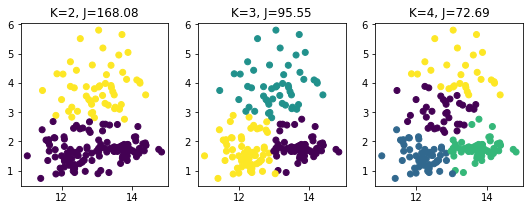

In [ ]:
# Fit all features of original data, plot by first and second attribute
# x = first attribute, y = second attribute
KmeansPlot(X,Y,'1. Fit all features of original data')

# Fit only sepal length and width, plot by sepal length and width
# x = first attribute, y = second attribute
X_1st_and_2nd_att = X.iloc[:,:2]
KmeansPlot(X_1st_and_2nd_att,Y,'2. Fit only first and second attribute')

## original data vs. normalized data
* Fit all features of original data, plot by sepal length and width.
* Fit all features of normalized data, plot by sepal length and width.

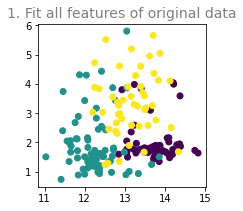

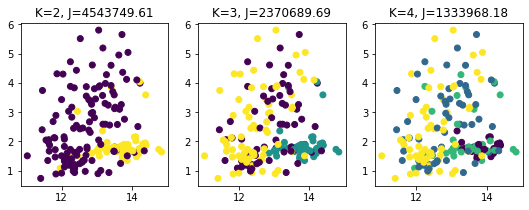

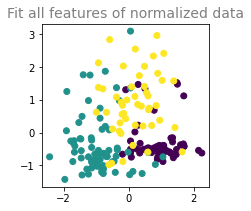

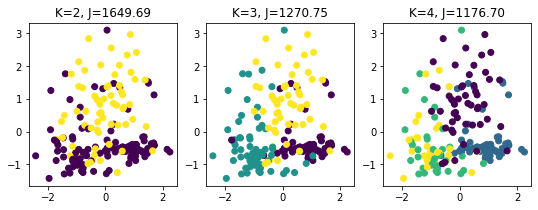

In [ ]:
# Fit all features of original data, plot by first and second attribute
# x = first attribute, y = second attribute
KmeansPlot(X,Y,'1. Fit all features of original data')

# Fit all features of normalized data, plot by first and second attribute
X_normal = (X-X.mean())/X.std()
KmeansPlot(X_normal,Y,'Fit all features of normalized data')

<div class="alert alert-info">
    <font color=green><mark>!思考:</mark></font>
    
* Data經normalized與否，有什麼樣的差別? <br>
Ans: 感覺經過normalized後，在k=3的情況下可以看到分群更加明顯。

<div class="alert alert-info">
    <font color=green><mark>!思考:</mark></font>
    
* 為何在wine data裡，其J值(inertia_)有這樣的區別?<br>
Ans: inertia表示data與中心距離的平方和，當inertia愈低則表示該分群結果愈佳，我們可以從這邊證明normalized結果是較orignial data好的。

## 分群的最佳數目 (Optimal number of clusters)
* Elbow Method
* Average Silhouette Method

### K-means Elbow method

Text(0.5, 1.0, 'Elbow Method')

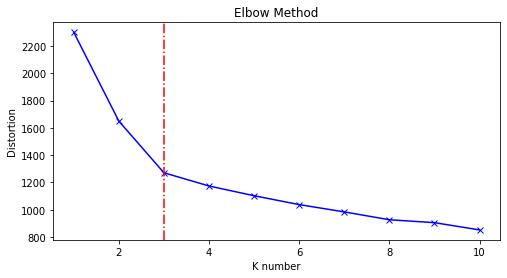

In [ ]:
distortions = []
for k in range(1,11):
  kmeanModel = cluster.KMeans(n_clusters=k, n_init=10).fit(X_normal)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), distortions, 'bx-')
# find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph.
plt.axvline(x=3, c='r', ls='-.')
plt.xlabel('K number')
plt.ylabel('Distortion')
plt.title('Elbow Method')

### K-means Average Silhouette Method

Text(0.5, 1.0, 'Average Silhouette Method')

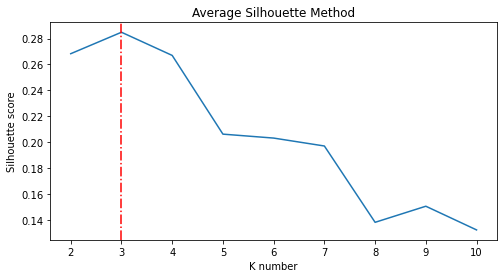

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for k in range(2,11):
  kmeanModel = cluster.KMeans(n_clusters=k, n_init=10).fit(X_normal)
  silhouette_avg.append(silhouette_score(X_normal, kmeanModel.labels_))

plt.figure(figsize=(8,4))
plt.plot(range(2,11), silhouette_avg)
# Silhouette score is maximized at k = 3. So, we will take 3 clusters.
plt.axvline(x=3, c='r', ls='-.')
plt.xlabel('K number')
plt.ylabel('Silhouette score')
plt.title('Average Silhouette Method')

# Hierarchical Clustering

In [ ]:
# Hierarchical clustering: bottom-up
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(X_normal, 'ward') #construct linkage matrix

f_dis = fcluster(Z,t=5,criterion='distance') #max distance within clusters
print(f_dis)

f_clu = fcluster(Z,t=3,criterion='maxclust') #assign max cluster number
print(f_clu)

[16 18 13 14 10 14 18 15 18 16 14 18 18 14 14 13 13 13 14 15 16 15 18 12
 12 10 12 18 10 18 13 14 12 13 12 12 12 12 18 15 16 15 14 15 16 15 18 16
 13 14 17 18 14 13 16 13 16 12 14 26  7  7 26 28 23 12 17 25  7 24  8 10
 20 10 28 26 26  8 24 19 25 25 23  5 28 25 23 23 22 23 22 22 22 25 25 24
  9 25 28 21 26 25 20 25 25 22 25 22 25 28 27 20 23 23 23 21 25 20  5 20
 28 11 19 27 27 20 20 19 20 20  8  8  8  8  7  7  6  6  5  4  4  8  4  5
  8  8  5  6  2  3  3  3  3  2  7  6  2  6  1  1  6  4  4  8  2  5  3  2
  3  3  8  2  2  6  2  2  2  3]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 2 2 3 1 3 1 2 3 2
 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, "criterion='maxclust 3'")

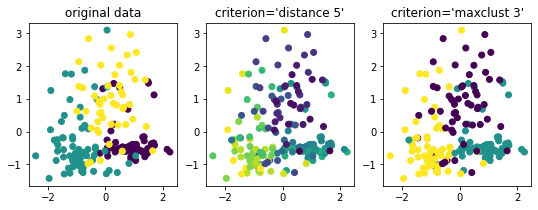

In [ ]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X_normal.iloc[:, 0], X_normal.iloc[:, 1], c=Y)
plt.title("original data")

plt.subplot(132)
plt.scatter(X_normal.iloc[:, 0], X_normal.iloc[:, 1], c=f_dis)
plt.title("criterion='distance 5'")

plt.subplot(133)
plt.scatter(X_normal.iloc[:, 0], X_normal.iloc[:, 1], c=f_clu)
plt.title("criterion='maxclust 3'")

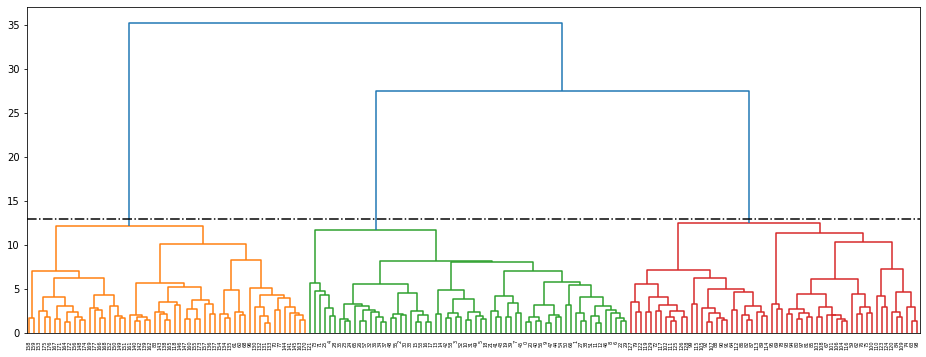

In [ ]:
# dendrogram
fig = plt.figure(figsize=(16, 6))
dn = dendrogram(Z)
plt.axhline(y=13, c='k', ls='-.')

<div class="alert alert-info">
    <font color=green><mark>!思考:</mark></font>

### Partitional Clustering v.s. Hierarchical Clustering (特性，優缺點) <br>
* Partitional Clustering:
1. 計算速度較Hierarchical快
2. 需要先定義分成多少類別(k=?)
3. 群集分界不能是曲線和折線
4. 離群值可能使群集中心偏移
* Hierarchical Clustering:
1. 概念簡單，可以直觀清楚地用樹狀結構來表現整個計算過程。
2. 只需要資料點兩兩之間的距離，就可以建構分群結果，而不需要資料點的實際座標。
3. 只適用於少量資料，大量資料會使整個結構變得相當複雜。
